In [39]:
import pandas as pd
import numpy as nd
from sklearn import linear_model
import seaborn as sns

In [7]:
#read csv
df = pd.read_csv("Car_train_data.csv")
df

name  year  km_driven    fuel  \
0                            Maruti Alto 800 LXI  2017      35000  Petrol   
1                           Maruti Swift 1.3 VXi  2007      70000  Petrol   
2                 Maruti Eeco Smiles 5 Seater AC  2013     120000  Petrol   
3                           Honda Amaze S i-VTEC  2019       1303  Petrol   
4                   Hyundai Grand i10 CRDi Magna  2015      80000  Diesel   
...                                          ...   ...        ...     ...   
6123                      Maruti Swift Dzire VXI  2013      67000  Petrol   
6124  Mercedes-Benz E-Class Exclusive E 200 BSIV  2019      17000  Petrol   
6125                         Chevrolet Cruze LTZ  2010     135000  Diesel   
6126                     Mahindra XUV500 W10 2WD  2016      70000  Diesel   
6127           Toyota Etios Liva 1.2 V Dual Tone  2017      50000  Petrol   

     seller_type transmission         owner     mileage   engine  max_power  \
0     Individual       Manual   First Owner   24.7 kmpl   796 CC   47.3 bhp   
1     Individual       Manual   Third Owner         NaN      NaN        NaN   
2     Individual       Manual  Second Owner   15.1 kmpl  1196 CC     73 bhp   
3         Dealer       Manual   First Owner   17.8 kmpl  1198 CC   86.7 bhp   
4     Individual       Manual   Third Owner   24.0 kmpl  1120 CC     70 bhp   
...          ...          ...           ...         ...      ...        ...   
6123  Individual       Manual   First Owner   19.1 kmpl  1197 CC   85.8 bhp   
6124      Dealer    Automatic   First Owner   15.0 kmpl  1991 CC  194.4 bhp   
6125  Individual       Manual   Third Owner   18.3 kmpl  1991 CC  147.9 bhp   
6126  Individual       Manual   First Owner   16.0 kmpl  2179 CC    140 bhp   
6127  Individual       Manual   First Owner  17.71 kmpl  1197 CC   78.9 bhp   

                   torque  seats  selling_price  
0           69Nm@ 3500rpm    5.0         270000  
1                     NaN    NaN         150000  
2          101Nm@ 3000rpm    5.0         260000  
3          109Nm@ 4500rpm    5.0         690000  
4     160Nm@ 1500-2750rpm    5.0         350000  
...                   ...    ...            ...  
6123       114Nm@ 4000rpm    5.0         450000  
6124  300Nm@ 1600-4000rpm    5.0        5200000  
6125       327Nm@ 2600rpm    5.0         250000  
6126  330Nm@ 1600-2800rpm    7.0        1350000  
6127       104Nm@ 3100rpm    5.0         585000  

[6128 rows x 13 columns]

In [10]:
inputs = df.drop(["name","seller_type","owner","mileage","engine","max_power","torque","seats"],axis="columns")
target=df.selling_price


In [11]:
#Encoding
from sklearn.preprocessing import LabelEncoder
Numerics=LabelEncoder()

In [17]:
#New encoded columns
inputs["fuel_n"]=Numerics.fit_transform(inputs["fuel"])
inputs["Transmission_n"]=Numerics.fit_transform(inputs["transmission"])
inputs

year  km_driven    fuel transmission  selling_price  fuel_n  \
0     2017      35000  Petrol       Manual         270000       3   
1     2007      70000  Petrol       Manual         150000       3   
2     2013     120000  Petrol       Manual         260000       3   
3     2019       1303  Petrol       Manual         690000       3   
4     2015      80000  Diesel       Manual         350000       1   
...    ...        ...     ...          ...            ...     ...   
6123  2013      67000  Petrol       Manual         450000       3   
6124  2019      17000  Petrol    Automatic        5200000       3   
6125  2010     135000  Diesel       Manual         250000       1   
6126  2016      70000  Diesel       Manual        1350000       1   
6127  2017      50000  Petrol       Manual         585000       3   

      Transmission_n  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1  
...              ...  
6123               1  
6124               0  
6125               1  
6126               1  
6127               1  

[6128 rows x 7 columns]

In [19]:
inputs_n=inputs.drop(["fuel","transmission","selling_price"],axis="columns")
inputs_n

year  km_driven  fuel_n  Transmission_n
0     2017      35000       3               1
1     2007      70000       3               1
2     2013     120000       3               1
3     2019       1303       3               1
4     2015      80000       1               1
...    ...        ...     ...             ...
6123  2013      67000       3               1
6124  2019      17000       3               0
6125  2010     135000       1               1
6126  2016      70000       1               1
6127  2017      50000       3               1

[6128 rows x 4 columns]

In [24]:
#linear regression
model = linear_model.LinearRegression()

In [25]:
#training
model.fit(inputs_n,target)

LinearRegression()

In [26]:
#prediction
pred=model.predict([[2010,135000,1,1]])
print(pred)

[381068.42803811]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [29]:
from matplotlib import style
import matplotlib.pyplot as plt

In [35]:
Fuel_type = df["fuel"]
seller_type = df["seller_type"]
transmission_type = df["transmission"]
selling_price = df["selling_price"]

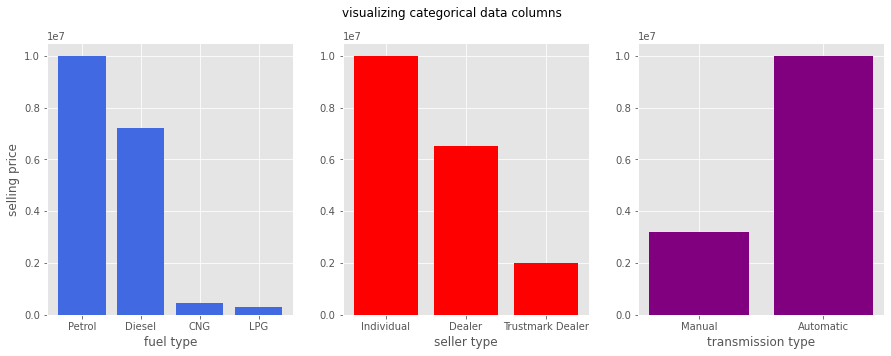

In [37]:
style.use("ggplot")
fig = plt.figure(figsize=(15,5))
fig.suptitle("visualizing categorical data columns")
plt.subplot(1,3,1)
plt.bar(Fuel_type,selling_price, color="royalblue")
plt.xlabel("fuel type")
plt.ylabel("selling price")
plt.subplot(1,3,2)
plt.bar(seller_type, selling_price, color="red")
plt.xlabel("seller type")
plt.subplot(1,3,3)
plt.bar(transmission_type, selling_price, color="purple")
plt.xlabel("transmission type")
plt.show()

<AxesSubplot:xlabel='transmission', ylabel='selling_price'>

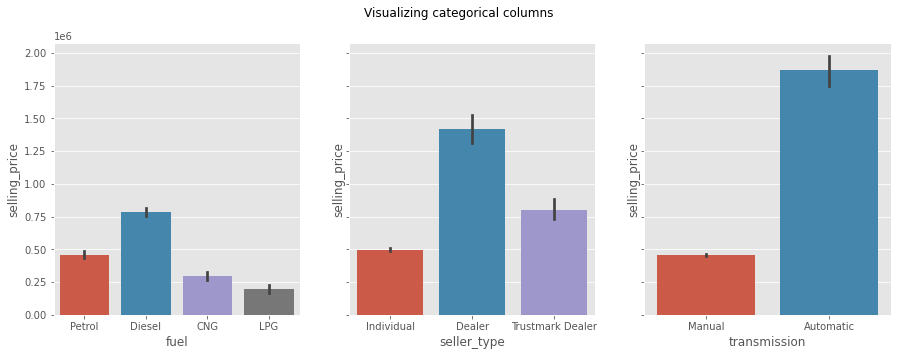

In [40]:
fig, axes = plt.subplots(1,3, figsize=(15,5), sharey= True)
fig.suptitle("Visualizing categorical columns")
sns.barplot(x=Fuel_type, y=selling_price, ax=axes[0])
sns.barplot(x=seller_type, y=selling_price, ax=axes[1])
sns.barplot(x=transmission_type, y=selling_price, ax=axes[2])

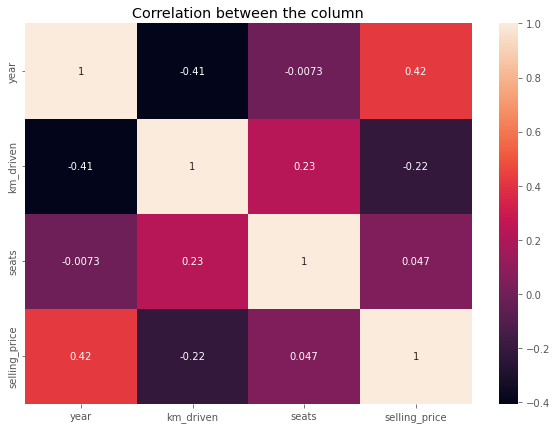

In [42]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation between the column")
plt.show()